In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("finalTrain.csv")

In [3]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
df.shape

(45584, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [6]:
df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

***We can see lot of missing values we can handle it once we analysis the data***

In [7]:
df.drop(["ID", "Delivery_person_ID", "Order_Date"], axis=1, inplace=True)

***Its not useful to keep ID columns, Delivery person Id columns because the catergory list is too much and i dropped order date column since it is not a time series problem***

In [8]:
# let separate numerical and categorical columns for analysis

num_columns = ["Delivery_person_Age", "Delivery_person_Ratings", "Time_taken (min)", "Restaurant_latitude", "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude"]
           
cat_columns = ["multiple_deliveries", 'Vehicle_condition', "City", "Type_of_vehicle", "Type_of_order", "Festival","Weather_conditions", "Road_traffic_density"]

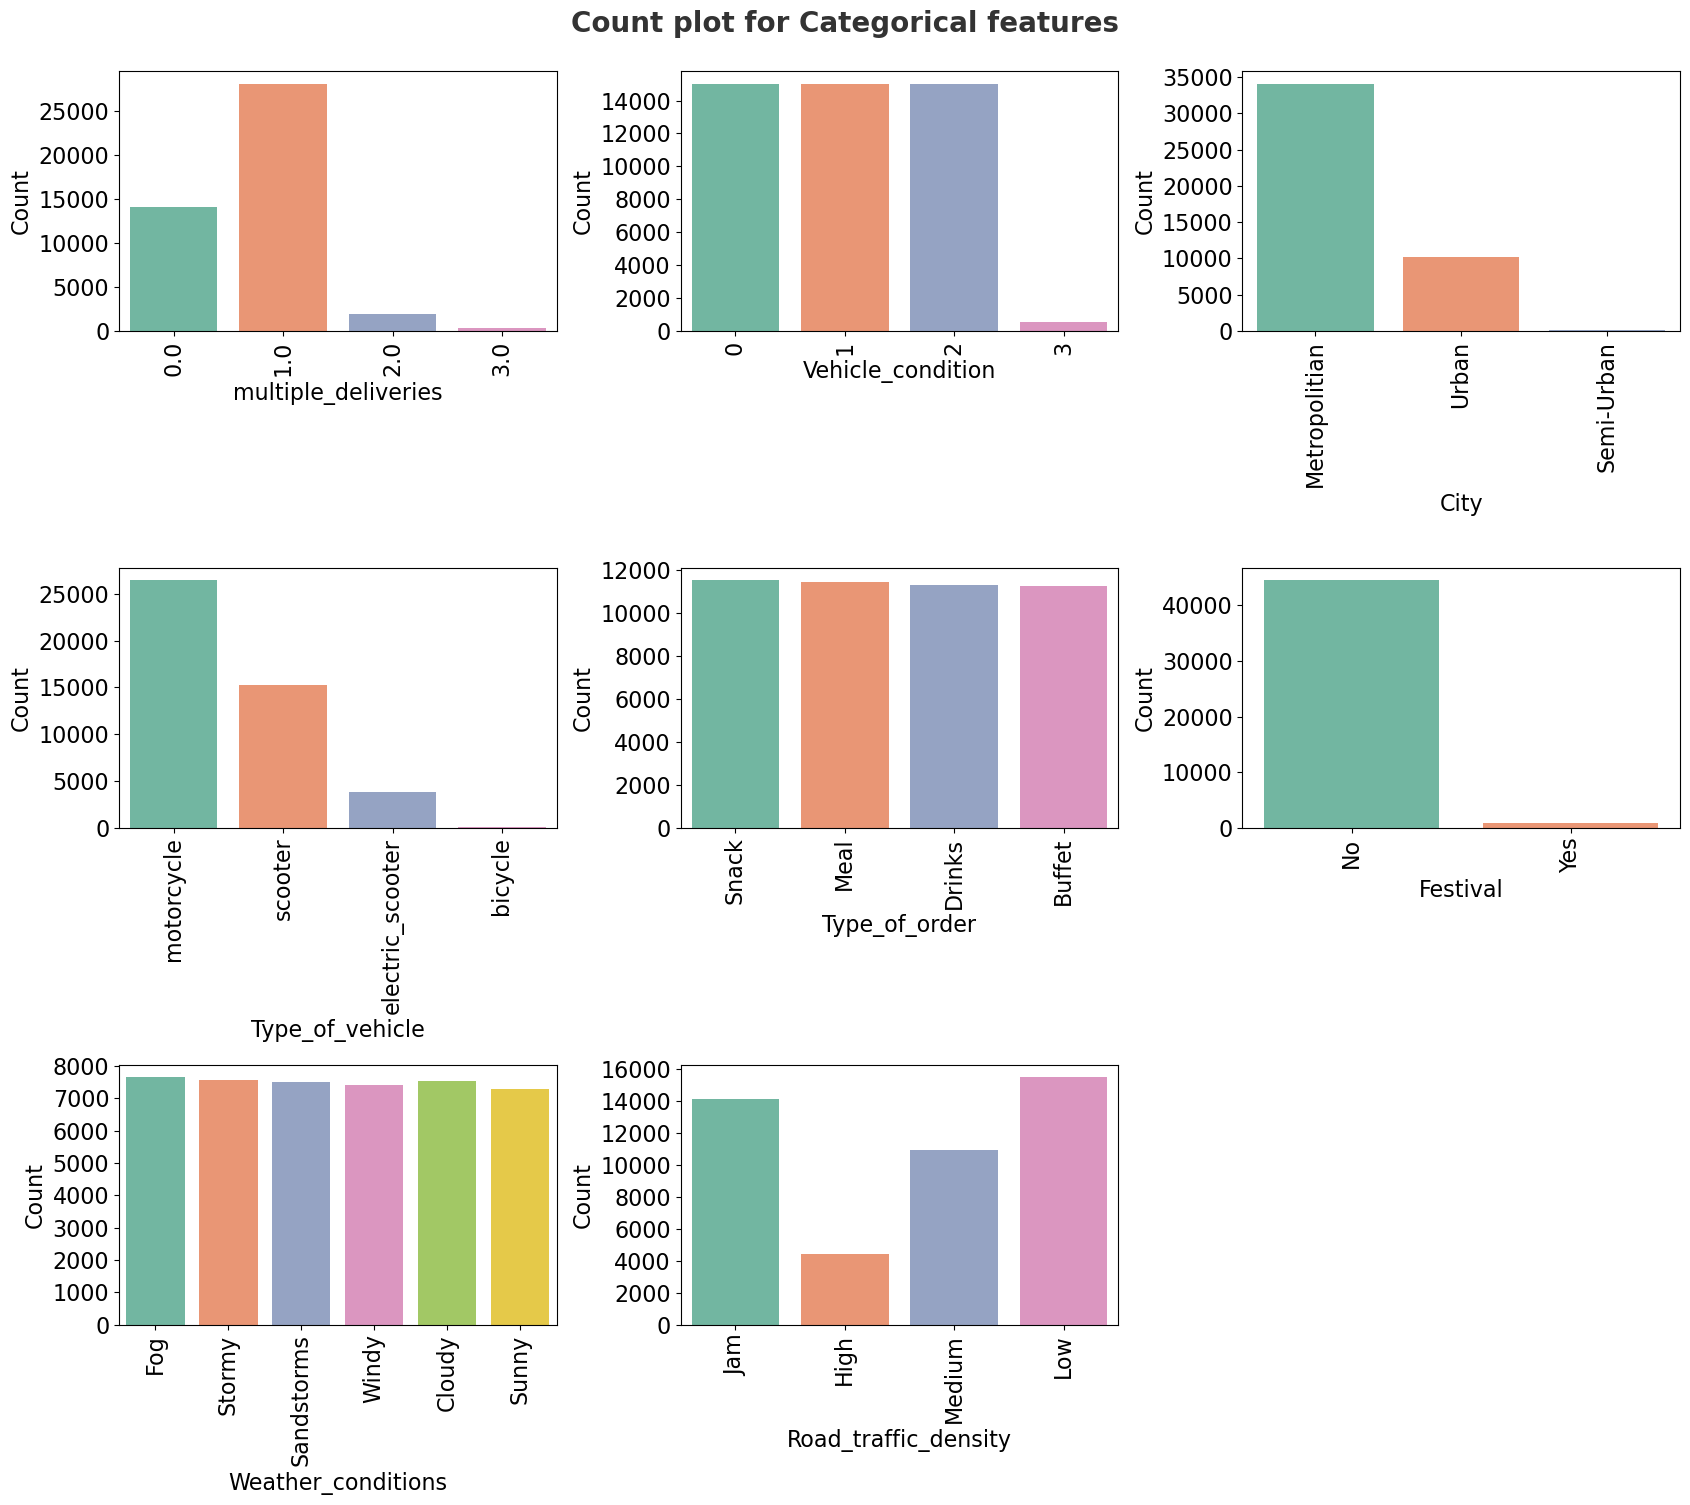

In [9]:
plt.figure(figsize=(17, 15))
plt.suptitle('Count plot for Categorical features', 
             fontsize=20, 
             fontweight='bold', 
             alpha=0.8, 
             y=1.)

for i in range(len(cat_columns)):
    plt.subplot(3, 3, i+1)
    ax = sns.countplot(x=df[cat_columns[i]],palette="Set2") # Palette is color type
    plt.xlabel(cat_columns[i], fontsize=16)
    plt.xticks(rotation=90, fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()    

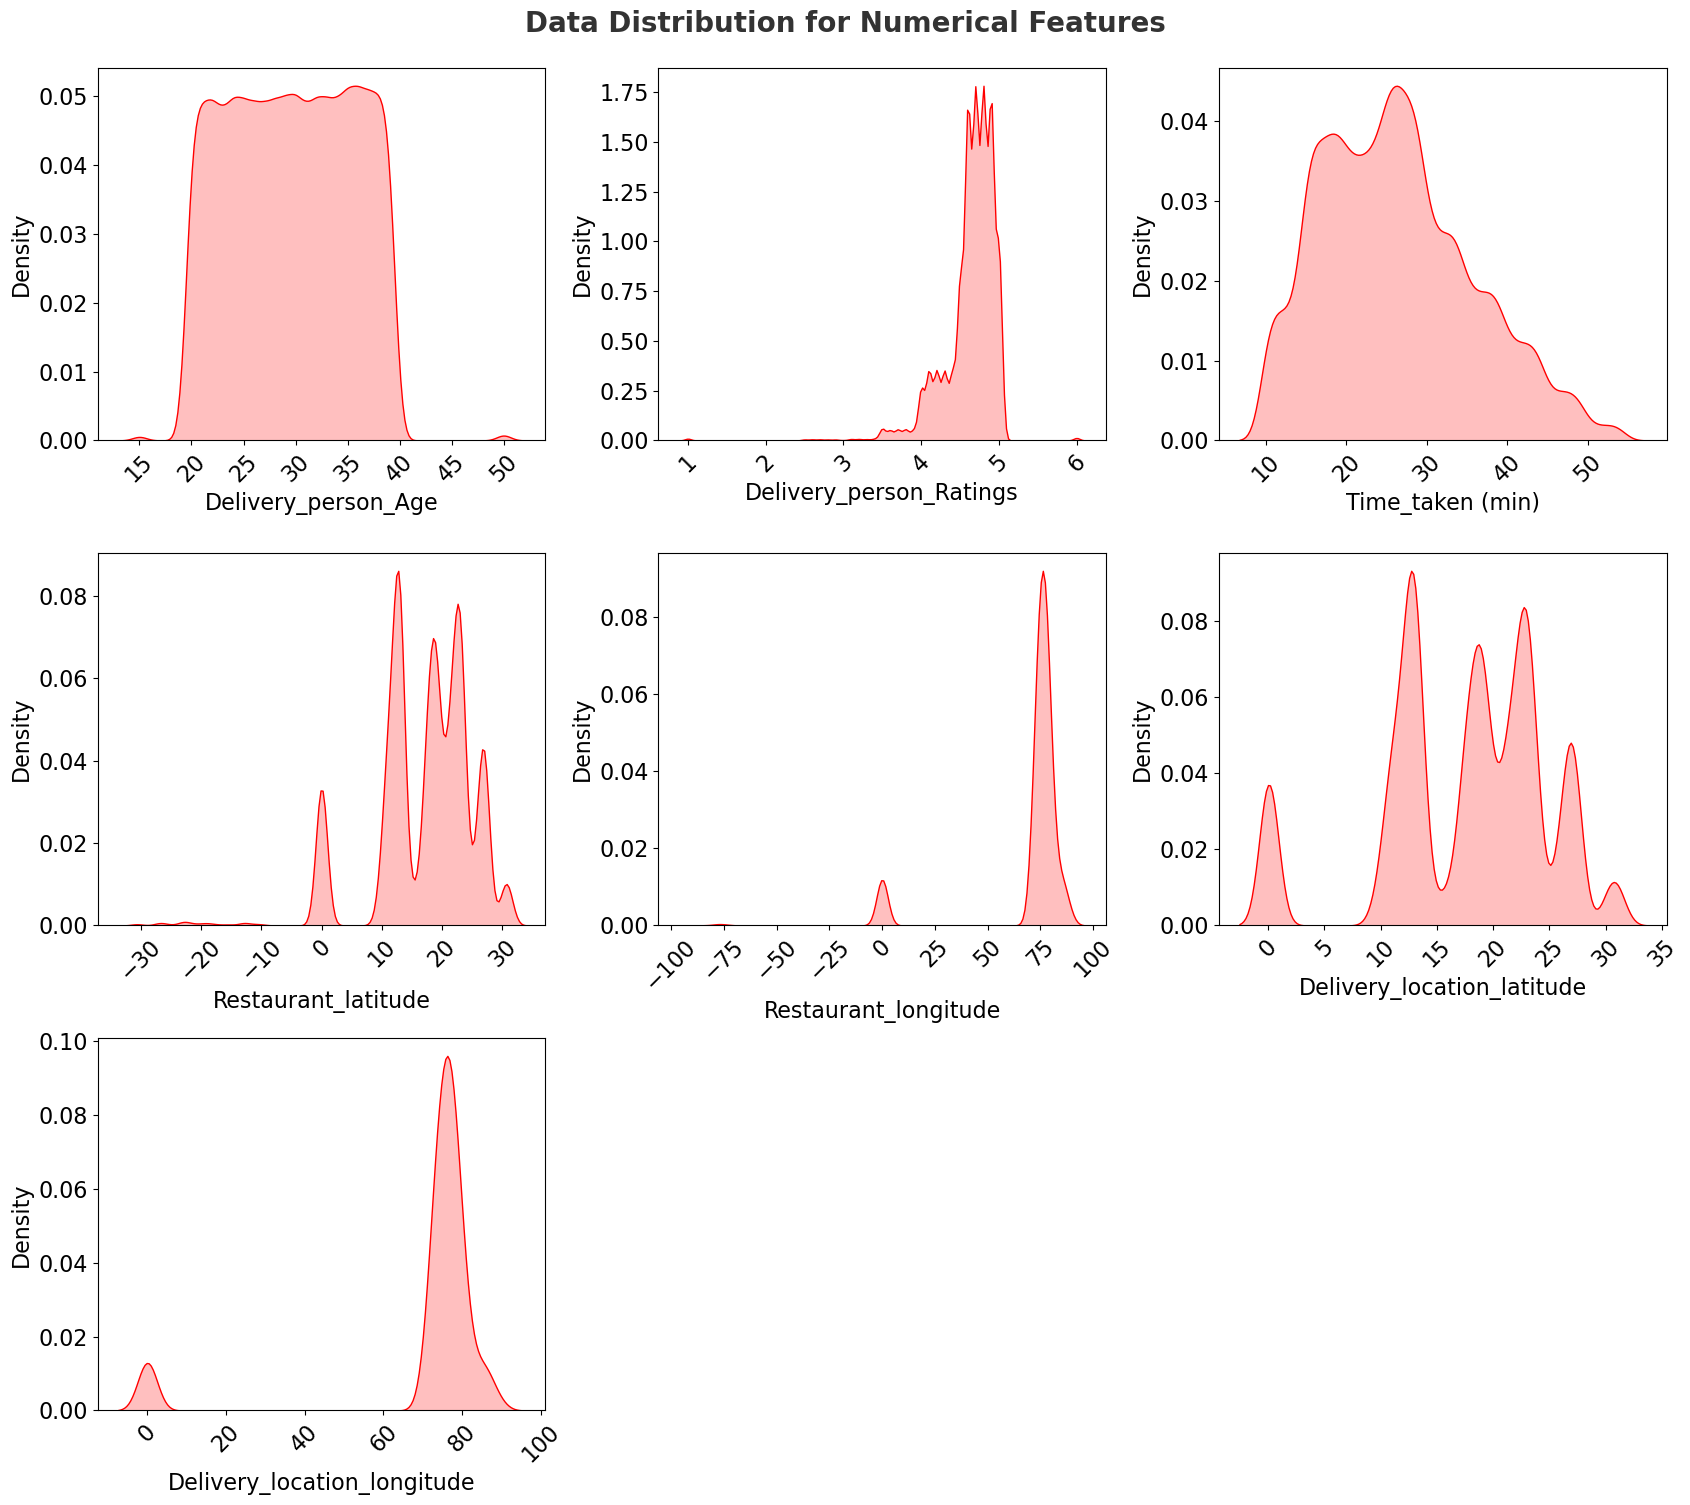

In [10]:
plt.figure(figsize=(17, 15))
plt.suptitle('Data Distribution for Numerical Features', 
             fontsize=20, 
             fontweight='bold', 
             alpha=0.8, 
             y=1.)

for i in range(0, len(num_columns)):
    plt.subplot(3, 3, i+1)
    ax = sns.kdeplot(df[num_columns[i]], fill=True, color='r')
    plt.xlabel(num_columns[i], fontsize=16)
    plt.xticks(rotation=45, fontsize=16)
    ax.set_ylabel('Density', fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()

### Box plot for time taken

<Axes: ylabel='Time_taken (min)'>

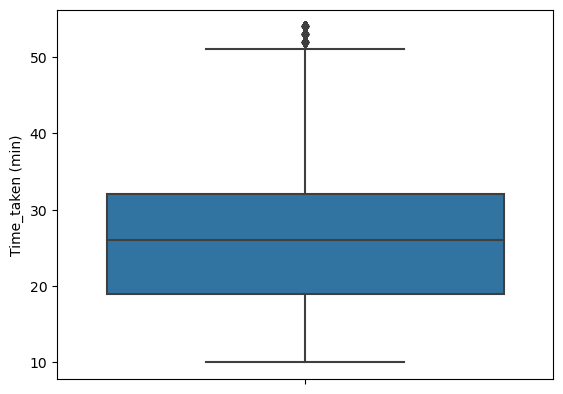

In [11]:
sns.boxplot(y = df["Time_taken (min)"])

***Upper fence is around 50 minutes. we can see few outliers. However Based on the algorithm we have to decide to keep or remove***

### Relation between Categorical features and Time taken 

In [12]:
def average_time_taken(column):
    print(f"Analysis for {column}: ")
    for cat in list(df[column].unique()):
        average_ratings_fy = df[df[column]==cat]["Time_taken (min)"].mean()
        print(f"Average Time_taken for {cat}: {round(average_ratings_fy, 2)}")
average_time_taken("City")

Analysis for City: 
Average Time_taken for Metropolitian: 27.31
Average Time_taken for Urban: 22.98
Average Time_taken for Semi-Urban: 49.73
Average Time_taken for nan: nan


In [13]:
average_time_taken("Festival")

Analysis for Festival: 
Average Time_taken for No: 25.98
Average Time_taken for Yes: 45.52
Average Time_taken for nan: nan


In [14]:
average_time_taken("multiple_deliveries")

Analysis for multiple_deliveries: 
Average Time_taken for 3.0: 47.82
Average Time_taken for 1.0: 26.85
Average Time_taken for 0.0: 22.88
Average Time_taken for nan: nan
Average Time_taken for 2.0: 40.45


In [15]:
average_time_taken("Type_of_order")

Analysis for Type_of_order: 
Average Time_taken for Snack: 26.29
Average Time_taken for Meal: 26.42
Average Time_taken for Drinks: 26.19
Average Time_taken for Buffet: 26.28


In [16]:
average_time_taken("Vehicle_condition")

Analysis for Vehicle_condition: 
Average Time_taken for 2: 24.45
Average Time_taken for 1: 24.35
Average Time_taken for 0: 30.07
Average Time_taken for 3: 26.49


In [17]:
average_time_taken("Type_of_vehicle")

Analysis for Type_of_vehicle: 
Average Time_taken for motorcycle: 27.61
Average Time_taken for scooter: 24.48
Average Time_taken for electric_scooter: 24.47
Average Time_taken for bicycle: 26.43


In [18]:
average_time_taken("Weather_conditions")

Analysis for Weather_conditions: 
Average Time_taken for Fog: 28.91
Average Time_taken for Stormy: 25.87
Average Time_taken for Sandstorms: 25.88
Average Time_taken for Windy: 26.12
Average Time_taken for Cloudy: 28.92
Average Time_taken for Sunny: 21.86
Average Time_taken for nan: nan


***We can see differences of time taken for all categories except Type_of_order***

In [19]:
df["Delivery_person_Ratings"].unique()

array([4.2, 4.7, 4.3, 4.5, 4. , 4.9, 4.1, 5. , 4.8, 3.5, 4.6, nan, 4.4,
       3.8, 3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 6. , 3.4,
       2.8, 2.9, 3. ])

In [20]:
def change_rating(col):
    if col >= 4.5:
        return "greater than 4.5"
    elif 4.0 <= col < 4.5:
        return "from 4.0 to 4.5"
    elif 3.0 <= col < 4.0:
        return "from 3.0 to 4.0"
    elif col < 3.0:
        return "less than 3.0"
    else:
        return np.nan

In [21]:
df["Delivery_person_Age"].unique()

array([36., 21., 23., 34., 24., 29., 35., 33., 25., 31., 37., 27., 32.,
       26., 38., 20., 22., nan, 28., 39., 30., 15., 50.])

In [22]:
def change_age(col):
    if col <= 25:
        return "less than 25"
    elif 25 < col <= 30:
        return "from 25 to 30"
    elif col > 30:
        return "grearter than 30"
    else:
        return np.nan

In [23]:
df_copy = df.copy()

In [24]:
df_copy["Delivery_person_Ratings"] = df_copy["Delivery_person_Ratings"].apply(change_rating)
df_copy["Delivery_person_Age"] = df_copy["Delivery_person_Age"].apply(change_age)

<Axes: xlabel='Delivery_person_Ratings', ylabel='count'>

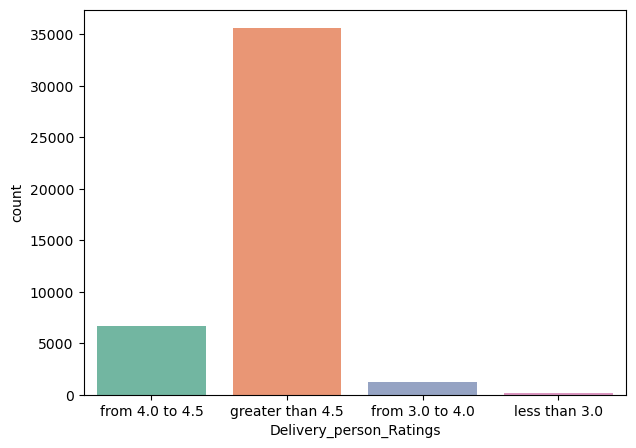

In [25]:
plt.figure(figsize=(7, 5))
sns.countplot(x=df_copy["Delivery_person_Ratings"],palette="Set2") # Palette is color type

<Axes: xlabel='Delivery_person_Age', ylabel='count'>

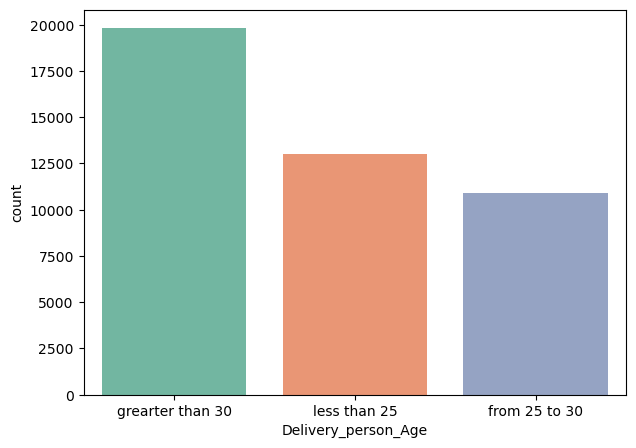

In [26]:
plt.figure(figsize=(7, 5))
sns.countplot(x=df_copy["Delivery_person_Age"],palette="Set2") # Palette is color type

***We can see the difference of every category for both age and ratings when compares it to target variable***

### Transform the Lattitude, Longitude and time columns

In [27]:
def find_not_in_time_format(df, col):
    li = df[col].value_counts().index
    not_time_list = []

    # Define the format string that corresponds to your time format
    format_str = '%H:%M'

    # Loop over each value in the dataset
    for i in li:
        try:
            # Try to parse the value as a time using datetime.strptime()
            datetime.datetime.strptime(i, format_str)
        except ValueError:
            not_time_list.append(i)

    for time in not_time_list:
        df[col].replace(time, np.nan, inplace=True)
    return df

In [28]:
def strip_time(col):
    le = col.split(":")
    if len(le) == 3:
        return f"{le[0]}:{le[1]}"
    else:
        return col

In [29]:
def loc_transform(df):
    df["equator_distance"] = df["Delivery_location_latitude"] - df["Restaurant_latitude"]
    return df

In [30]:
def time_col_transform(X):
    time_cols = ["Time_Orderd", "Time_Order_picked"]
    for col in time_cols:
        if col == "Time_Order_picked":
            X[col] = X[col].apply(strip_time)
        find_not_in_time_format(X, col)
        X[col] = pd.to_datetime(X[col], format='%H:%M')
    X["ordered_picked_diff"] = X["Time_Order_picked"] - X["Time_Orderd"]
    X['ordered_picked_diff'] = X['ordered_picked_diff'].dt.total_seconds() // 60
    X = X.drop(time_cols, axis=1)
    return X

In [31]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [32]:
df = time_col_transform(df)
df = loc_transform(df)

In [33]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),ordered_picked_diff,equator_distance
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,15.0,0.07
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,10.0,0.04
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,10.0,0.09
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,10.0,0.02
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,15.0,0.13


### Transformed feature analysis

In [34]:
df["ordered_picked_diff"].unique()

array([15., 10.,  5., nan])

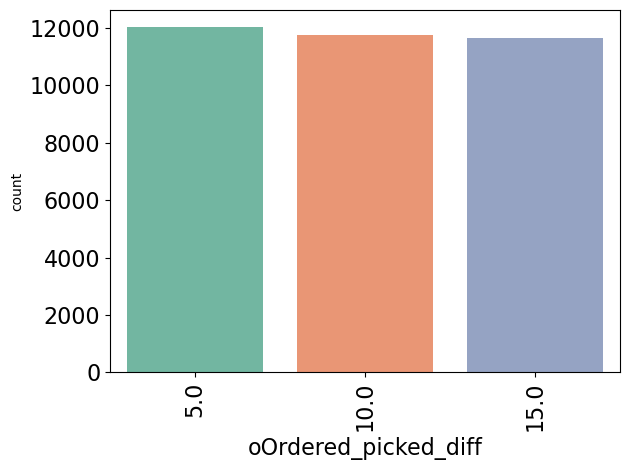

In [35]:
sns.countplot(x=df["ordered_picked_diff"],palette="Set2") # Palette is color type
plt.xlabel("oOrdered_picked_diff", fontsize=16)
plt.xticks(rotation=90, fontsize=16)
ax.set_ylabel('Count', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()    

In [36]:
average_time_taken("ordered_picked_diff")

Analysis for ordered_picked_diff: 
Average Time_taken for 15.0: 26.27
Average Time_taken for 10.0: 26.44
Average Time_taken for 5.0: 26.32
Average Time_taken for nan: nan


***We cant see relation between the categories and time taken. Every category provides the same result***

### Correlation between columns

/var/folders/0x/fr5n585d50j8t9x54rbwy91w0000gn/T/ipykernel_16492/299848463.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

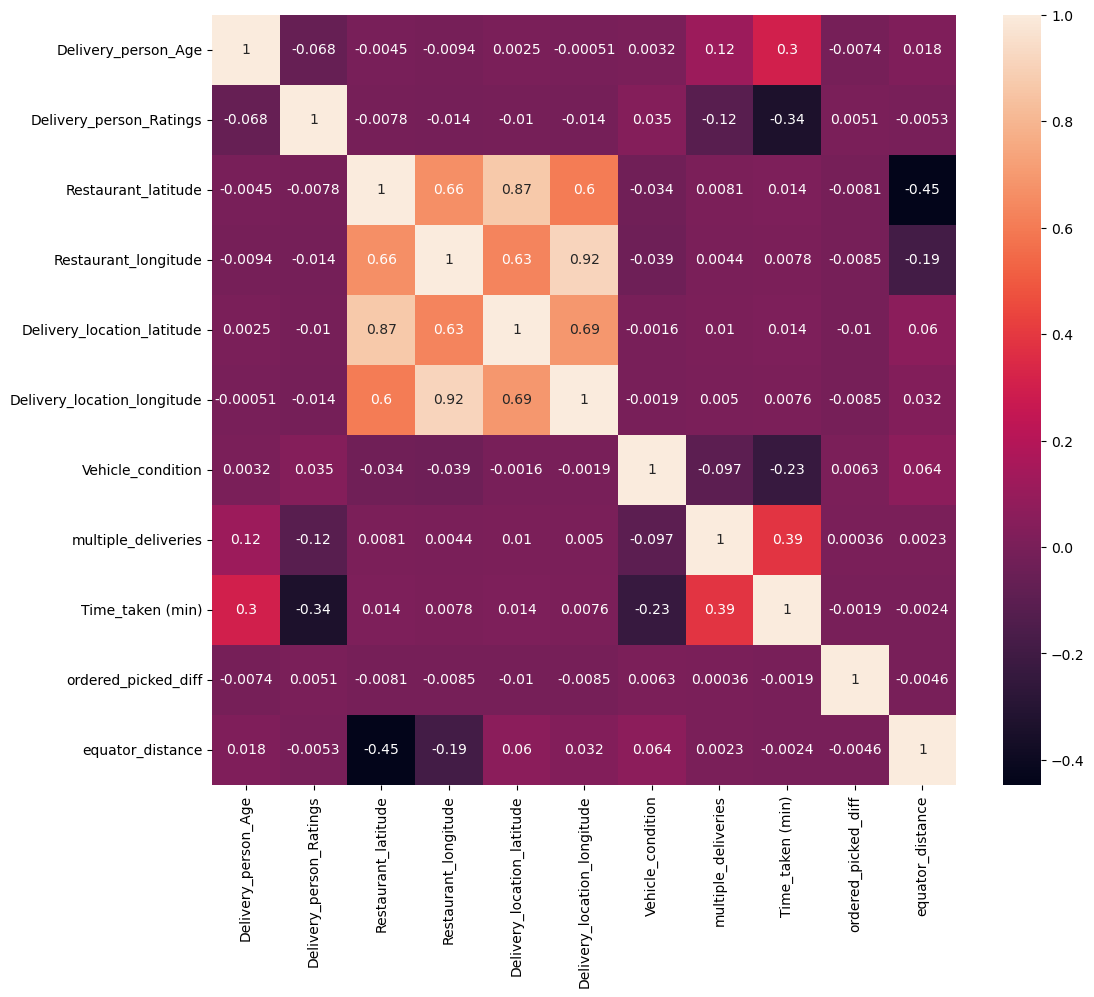

In [37]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)

***We can see correlation between independent and time taken is too low. Maximum correlation is 0.39. So linear regression will not be a right choice.***

### Pipeline for feature engineering

In [38]:
df.isna().sum()

Delivery_person_Age             1854
Delivery_person_Ratings         1908
Restaurant_latitude                0
Restaurant_longitude               0
Delivery_location_latitude         0
Delivery_location_longitude        0
Weather_conditions               616
Road_traffic_density             601
Vehicle_condition                  0
Type_of_order                      0
Type_of_vehicle                    0
multiple_deliveries              993
Festival                         228
City                            1200
Time_taken (min)                   0
ordered_picked_diff            10177
equator_distance                   0
dtype: int64

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer

mean_impute_cols = ["Delivery_person_Age", "Delivery_person_Ratings",
                    "equator_distance", "ordered_picked_diff", "Delivery_location_longitude",
                    'Delivery_location_latitude']
mode_impute_cols = ["multiple_deliveries", 'Vehicle_condition']
ordinal_encode_cols = ["City", "Type_of_vehicle", "Type_of_order", "Festival",
                       "Weather_conditions", "Road_traffic_density"]

city_columns = ["Urban", "Semi-Urban", "Metropolitian"]
type_of_vehicle_columns = ["bicycle", "electric_scooter", "scooter", "motorcycle"]
type_of_order_columns = ["Drinks", "Snack", "Meal", "Buffet"]
road_traffic_density_columns = ["Low", "Medium", "High", "Jam"]
festival_columns = ["No", "Yes"]
weather_conditions_columns = ['Cloudy', 'Sunny', 'Windy', 'Fog', 'Sandstorms', 'Stormy']

num_pipeline = Pipeline(steps=[
    ("num_impute", SimpleImputer(strategy="mean")),
])

cat_pipeline = Pipeline(steps=[
    ("cat_impute", SimpleImputer(strategy="most_frequent")),
])

encoding_pipeline = Pipeline(steps=[
    ("cat_impute", SimpleImputer(strategy="most_frequent")),
    ("ordinal_encode", OrdinalEncoder(categories=[city_columns, type_of_vehicle_columns,
                                                  type_of_order_columns,
                                                  festival_columns, weather_conditions_columns,
                                                  road_traffic_density_columns])),
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, mean_impute_cols),
    ("cat", cat_pipeline, mode_impute_cols),
    ("oc", encoding_pipeline, ordinal_encode_cols),
])

In [40]:
df.isna().sum()

Delivery_person_Age             1854
Delivery_person_Ratings         1908
Restaurant_latitude                0
Restaurant_longitude               0
Delivery_location_latitude         0
Delivery_location_longitude        0
Weather_conditions               616
Road_traffic_density             601
Vehicle_condition                  0
Type_of_order                      0
Type_of_vehicle                    0
multiple_deliveries              993
Festival                         228
City                            1200
Time_taken (min)                   0
ordered_picked_diff            10177
equator_distance                   0
dtype: int64

### Train_test split

In [41]:
X = df.drop(["Time_taken (min)"], axis=1)
y = df["Time_taken (min)"]

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Train_test preprocessing

In [43]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [44]:
pd.DataFrame(X_train).reset_index().isna().sum()

index    0
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
dtype: int64

In [45]:
pd.DataFrame(X_test).reset_index().isna().sum()

index    0
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
dtype: int64

***Missing values has been filled through preprocessing pipelines***

In [46]:
X_train, X_test

(array([[31.  ,  4.6 ,  0.08, ...,  0.  ,  1.  ,  3.  ],
        [36.  ,  4.7 ,  0.06, ...,  0.  ,  3.  ,  1.  ],
        [36.  ,  4.7 ,  0.11, ...,  0.  ,  0.  ,  3.  ],
        ...,
        [24.  ,  4.3 ,  0.05, ...,  0.  ,  2.  ,  0.  ],
        [27.  ,  4.4 ,  0.07, ...,  0.  ,  5.  ,  1.  ],
        [32.  ,  3.6 ,  0.08, ...,  0.  ,  5.  ,  3.  ]]),
 array([[3.2e+01, 4.1e+00, 5.0e-02, ..., 0.0e+00, 4.0e+00, 1.0e+00],
        [3.2e+01, 4.9e+00, 1.0e-02, ..., 0.0e+00, 2.0e+00, 0.0e+00],
        [2.3e+01, 4.5e+00, 7.0e-02, ..., 0.0e+00, 1.0e+00, 3.0e+00],
        ...,
        [3.2e+01, 3.8e+00, 8.0e-02, ..., 0.0e+00, 0.0e+00, 0.0e+00],
        [3.6e+01, 4.6e+00, 8.0e-02, ..., 0.0e+00, 4.0e+00, 1.0e+00],
        [2.2e+01, 4.9e+00, 8.0e-02, ..., 0.0e+00, 3.0e+00, 0.0e+00]]))

***Encoding for the columns has been succefully done***